<h1> Hateful Meme Detection</h1>
<h3>Steps</h3>
<ol >
<li>Object Detection using Detectron </li>
<li>Facial features extraction (Race and gender) using Deepface (Tensorflow based library) if face is present in image </li>
<li>Text Detection using EasyOCR </li>
<li>Text removal for a clean image</li>
<li>Image to text captioning using LSTM Tensorflow </li>
<li>Knowledge graph extraction</li>
<li>Final sentence</li>
<li>Sentiment score of final sentence</li>
</ol>


<h2> Step 1</h2 >
<p> Object Detection using Detectron</p>


C:\Users\david\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tensor([0])
Boxes(tensor([[  3.0590,  79.6121, 265.8399, 395.8014]]))


True

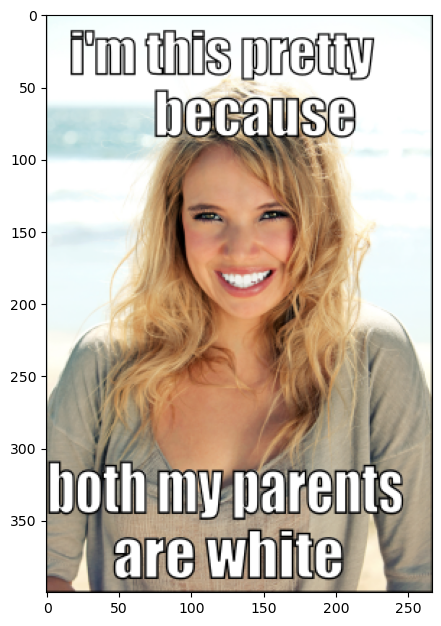

<Figure size 1000x500 with 0 Axes>

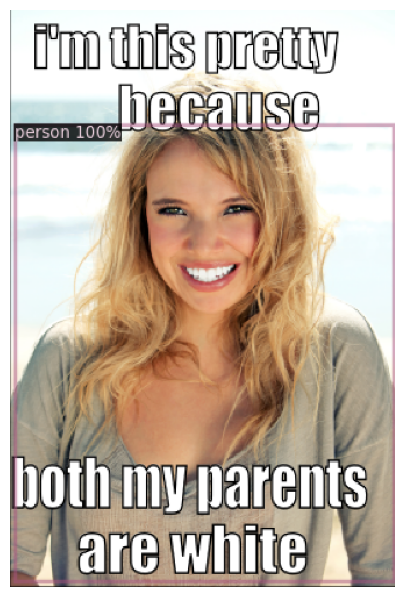

In [1]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

# get image
im = cv2.imread("data/test/01865.png")
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1]) #bgr to rgb
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
# Create predictor

# If getting AssertionError: Torch not compiled with CUDA enabled detectron2. Then do the below given line
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)
outputs = predictor(im)
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25, 7.5)), plt.imshow(im), plt.axis('off');


plt.figure(figsize=(10, 5))

a = cv2_imshow(out.get_image()[:, :, ::-1])

a = (out.get_image()[:, :, ::-1])
cv2.imwrite('C://Users//david//PycharmProjects//hmd//outut.jpg', a)
## keypoint detection  : detecting people and localizing their keypoints.

<h2>Step 2 </h2>
<p>Facial Features Detection</p>

Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 6s 6s/step


Action: race:  50%|█████     | 1/2 [00:07<00:07,  7.26s/it]  

1/1 [==============================] - 0s 337ms/step


Action: race: 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]


[80, 103, 107, 107]
{'gender': 'Woman', 'region': {'x': 80, 'y': 103, 'w': 107, 'h': 107}, 'race': {'asian': 8.327296127515801, 'indian': 11.03860354653618, 'black': 2.102479836492529, 'white': 27.456645813980447, 'middle eastern': 23.67520175428401, 'latino hispanic': 27.399774038778187}, 'dominant_race': 'white'}


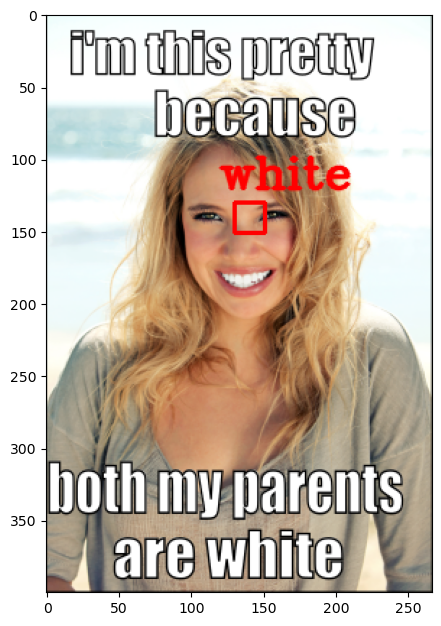

In [2]:
from deepface import DeepFace
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

#face verification
# result = DeepFace.verify(img1_path =  model_name = models[2])
# print(result)
import matplotlib.pyplot as plt
import cv2
imgpaths="data/test/01865.png"
o=cv2.imread(imgpaths)
o=cv2.cvtColor(o,cv2.COLOR_BGR2RGB)
obj = DeepFace.analyze(img_path = imgpaths, actions = [ 'gender', 'race'])
vox=obj['region']['x']
voy=obj['region']['y']
vow=obj['region']['w']
voh=obj['region']['h']
dim=[vox,voy,voh,vow]
print(dim)
print(obj)
import math
hyposm= math.sqrt((vox*vox)+(voy*voy))
hyposm
hypobg=math.sqrt((vow*vow)+(voh*voh))
hyposm=int(hyposm)
hypobg=int(hypobg)
start_point = (hyposm, hyposm)
end_point = (hypobg, hypobg)
color = (255, 0, 0)
thickness=2
image=cv2.rectangle(o,start_point,end_point,color,thickness)
font=cv2.FONT_HERSHEY_COMPLEX
fcc=(hyposm-10,hyposm-10)
fontscale=1
color=(255,0,0)
racetext=obj['dominant_race']
if obj['dominant_race']=='latino hispanic':
    racetext='Indian/Latino Hispanic+'

image=cv2.putText(image,racetext,fcc,font,fontscale,color,thickness,cv2.LINE_AA)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
plt.imshow(image)
plt.savefig('sjr.jpg')

In [16]:
import easyocr

reader = easyocr.Reader(['en'])


import cv2
import matplotlib.pyplot as plt

image = cv2.imread('data/test/01865.png')
res = reader.readtext('data/test/01865.png')

for (bbox, text, prob) in res:
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
# plt.rcParams['figure.figsize'] = (16, 16)
# plt.imshow(image)
for x in res:
    print(x[1])


FFm &his prety
pbecause
both mV parents
are [hite


In [20]:
from huggingface_hub import notebook_login
notebook_login()
from gramformer import Gramformer
gf = Gramformer(models=1, use_gpu=False)
# ow=res[0][0]
# print(ow)
opo=gf.correct('Om &his prety because both mV parents')
print(opo)

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

Looking for C:\Users\david\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\david\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 4s 4s/step


True

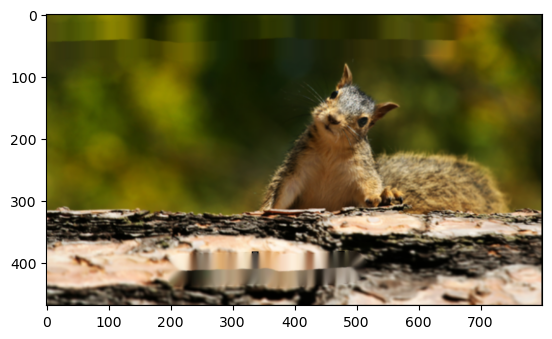

In [2]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

#General Approach.....
#Use keras OCR to detect text, define a mask around the text, and inpaint the
#masked regions to remove the text.
#To apply the mask we need to provide the coordinates of the starting and
#the ending points of the line, and the thickness of the line

#The start point will be the mid-point between the top-left corner and
#the bottom-left corner of the box.
#the end point will be the mid-point between the top-right corner and the bottom-right corner.
#The following function does exactly that.
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

#Main function that detects text and inpaints.
#Inputs are the image path and kreas_ocr pipeline
def inpaint_text(img_path, pipeline):
    # read the image
    img = keras_ocr.tools.read(img_path)

    # Recogize text (and corresponding regions)
    # Each list of predictions in prediction_groups is a list of
    # (word, box) tuples.
    prediction_groups = pipeline.recognize([img])

    #Define the mask for inpainting
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]

        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

        #For the line thickness, we will calculate the length of the line between
        #the top-left corner and the bottom-left corner.
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

        #Define the line and inpaint
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,
        thickness)
        inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

    return(inpainted_img)

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

img_text_removed = inpaint_text('01264.png', pipeline)

plt.imshow(img_text_removed)

cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))